Model Coefficients: [0.01353921 0.05720633]
Model Intercept: 1.768308001010869
Mean Squared Error (MSE): 0.011212537445558361
R² Score: 0.975934573990658


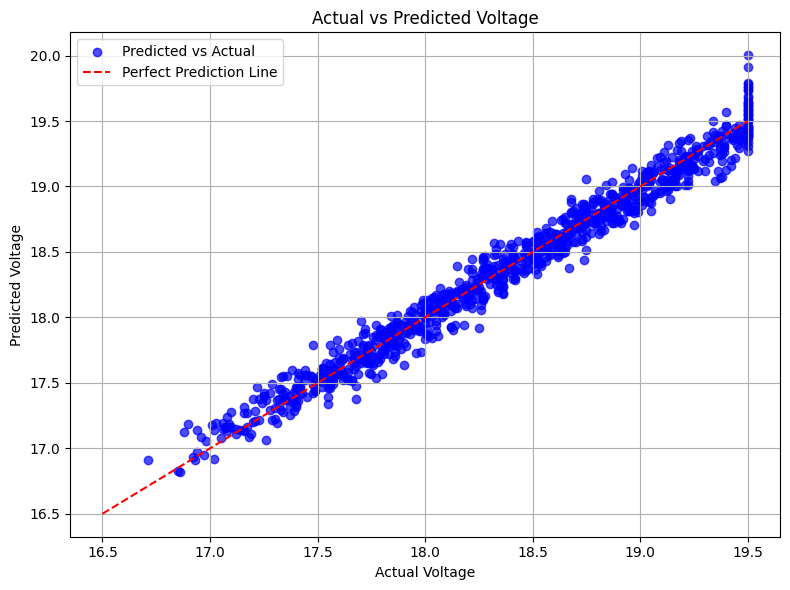

In [2]:
!pip install openpyxl scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_excel("SolarData18.xlsx")
data.columns = data.columns.str.strip().str.lower()
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')
data = data.dropna(subset=['timestamp', 'temperature', 'irradiance', 'voltage'])
X = data[['temperature', 'irradiance']]
y = data['voltage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))

# Scatter plot of predicted vs actual
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.7)

# Reference line (perfect prediction)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction Line')

# Labels and grid
plt.xlabel("Actual Voltage")
plt.ylabel("Predicted Voltage")
plt.title("Actual vs Predicted Voltage")
plt.legend()  # 👈 Adds the legend
plt.grid(True)
plt.tight_layout()
plt.show()
